TESTE:
# Título Grande
## Subtítulo
**Negrito** e *itálico*  
- Lista de itens
- Outro item
1. Lista numerada
2. Segundo item
[Link para o Google](https://www.google.com)

# Análise Exploratória dos Dados (EDA)

Inicialmente, foi realizada a leitura do dataset para iniciar a análise dos dados e examinar o conjunto de variáveis disponíveis.

O dataset contém diversas informações relevantes, como o preço por noite do aluguel, o tipo de espaço, a localização, a disponibilidade anual do quarto, o número mínimo de noites para reserva e a quantidade de avaliações. Esses dados são fundamentais para auxiliar o cliente na escolha do local ideal.

Além disso, o dataset também inclui informações relacionadas à identificação do anúncio na plataforma e sobre o Host, como os IDs, o nome do Host e o título do anúncio. Esses detalhes podem ser úteis para entender melhor a origem dos dados e a relação entre os anúncios e seus respectivos hosts.

### Leitura dos dados & Visualização

In [150]:
# Bibliotecas
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import geodatasets as gds
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re
import seaborn as sn
import pandas as pd
import warnings

from collections import Counter
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

warnings.filterwarnings("ignore")

In [2]:
# Leitura do DataSet & Dicionario de informações
help = {'id': 'Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo',
        'nome': 'Representa o nome do anúncio',
        'host_id': 'Representa o id do usuário que hospedou o anúncio',
        'host_name': 'Contém o nome do usuário que hospedou o anúncio',
        'bairro_group': 'Contém o nome do bairro onde o anúncio está localizado',
        'bairro': 'Contém o nome da área onde o anúncio está localizado',
        'latitude': 'Contém a latitude do local',
        'longitude': 'Contém a longitude do local',
        'room_type': 'Contém o tipo de espaço de cada anúncio',
        'price': 'Contém o preço por noite em dólares listado pelo anfitrião',
        'minimo_noites':'Contém o número mínimo de noites que o usuário deve reservar',
        'numero_de_reviews': 'Contém o número de comentários dados a cada listagem',
        'ultima_review': 'Contém a data da última revisão dada à listagem',
        'reviews_por_mes': 'Contém o número de avaliações fornecidas por mês',
        'calculado_host_listings_count': 'Contém a quantidade de listagem por host',
        'disponibilidade_365': 'Contém o número de dias em que o anúncio está disponível para reserva'}

df = pd.read_csv('teste_indicium_precificacao.csv')
df.head(20)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


---
A análise do resumo estatístico obtido via describe() revela a presença de aluguéis com preço igual a 0, bem como outliers com valores superiores a 10.000 dólares por noite.

Além disso, algumas acomodações exigem um número mínimo de noites muito superior ao percentil de 75% (5 noites), chegando a 1.250 noites no máximo.

O primeiro caso pode estar associado a acomodações altamente luxuosas, enquanto o segundo pode indicar que o anfitrião busca minimizar a rotatividade de hóspedes.

Esses outliers podem distorcer as análises e comprometer o desempenho do modelo, tornando sua remoção uma possível etapa importante no pré-processamento dos dados.

In [15]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.090928,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.597294,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


---
Algumas colunas possuem valores faltantes, como as colunas "ultima review" e "reviews_por_mes", que de acordo com df.head() e o df.info(), estão preenchidos com dados NaN.

Para esses valores ausentes, com a intenção de impedir possiveis erros de código durante a análise, foi definido a seguinte estrutura de substituição:


Nas colunas...
- "nome": NaN será substituido pela a palavra "For rent"
- "host_name": NaN será preenchido por "Unknown"
- "ultima_review": NaN por 0 
- "reviews_por_mes": NaN por 0 --> Estamos assumindo que o espaço nunca recebeu reviews

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [11]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [5]:
df['nome'] = df['nome'].fillna("For rent")
df['host_name'] = df['host_name'].fillna("Unknown")
df['ultima_review'] = df['ultima_review'].fillna(0)
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)

In [7]:
df.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [10]:
print('N° de Bairros:', len(df.bairro_group.unique()), 
    '\nN° de lugares:', len(df.bairro.unique()),
    '\nN° de host:', len(df.host_name.unique()))

N° de Bairros: 5 
N° de lugares: 221 
N° de host: 11453


## Hipóteses de négocio
***

A partir das informações fornecidas pelo dataset, com o objetivo de desenvolver um modelo para predição do preço de um aluguel, buscamos relacionar as variaveis que melhor impactam o valor de um aluguel. 

Portanto, é esperado que algumas hipóteses sejam formuladas, tais como:

1. O tipo do espaço deve impactar fortemente o preço: 
- É esperado que os "Entire home/apt" (Apartamentos/casas inteiro) stenham preços mais altos do que os demais
- Private room ("Quartos privados") tenham preços intermediários
- Shared room ("Quartos compartilhados") sejam os mais baratos

2. A localização (Bairros) também deve influenciar os preços (Lógica da oferta e demanda):
- Regiões centrais ou turísticas devem ter preços, em média, mais elevados
- Regiões mais afastadas dos centros devem ter preços mais baixos

3. A avaliação do espaço pode indicar maiores demandas (Lógica da oferta e demanda):
- Anuncios com muitos reviews pode significar alta procura e consequentemente ter preços competitivos
- Anuncios com poucas avaliações pode indicar espaços novos ou poucos atrativos
- A frequência de reviews por mês pode representar uma distribuição desigual:  algumas regiões podem ter alta procura e preços altos, enquanto outras têm alta demanda por serem baratas.

4. Alta disponibilidade anual pode diminuir os valores dos preços (Lógica da oferta e demanda)
- Espaços muito disponíveis tendem a ter preços mais baixos devido à necessidade de manter a ocupação alta.
- Espaços pouco disponiveis podem ter preços mais elevados, uma vez que são mais raros a disponibilidade.

5. Mínimo de noites mais baixos (como minimo_noites = 1) podem ter preços mais baixos, pois podem ser locais com foco em atender turistas de curta duração. Em contrapartida, mínimo de noites mais altos pode indicar preços mais altos pois o host busca estadias mais longas e menos trocas de hóspedes

6. Algumas palavras no nome do anuncio pode sinalizar imóveis caros, como Luxury, nome de um bairro de alto padrão (ex. Manhathan), apartamentos modernos (loft) entre outros.

---
### Hipótese 1: O tipo do espaço deve impactar fortemente o preço: 

É esperado que o preço médio por noite siga a ordem:


-Entire home/apt > Private room > Shared room


Para avaliar essa hipótese, foi elaborado um boxplot do preço por tipo de espaço (Figura 1). Como esperado, a análise visual do gráfico à direita confirma essa hierarquia, uma vez que a mediana, o terceiro quartil e o limite superior são maiores para "Entire home/apt", seguidos por "Private room" e, por último, "Shared room".


No gráfico à esquerda, observa-se que os outliers seguem esse mesmo padrão, com valores significativamente mais altos para "Entire home/apt". No entanto, como esses valores extremos representam, em geral, menos de 5% dos dados, seu impacto pode ser desconsiderado na análise principal.

Text(0.5, 0.98, 'Figura 1: Preço por noite em função do tipo de espaço')

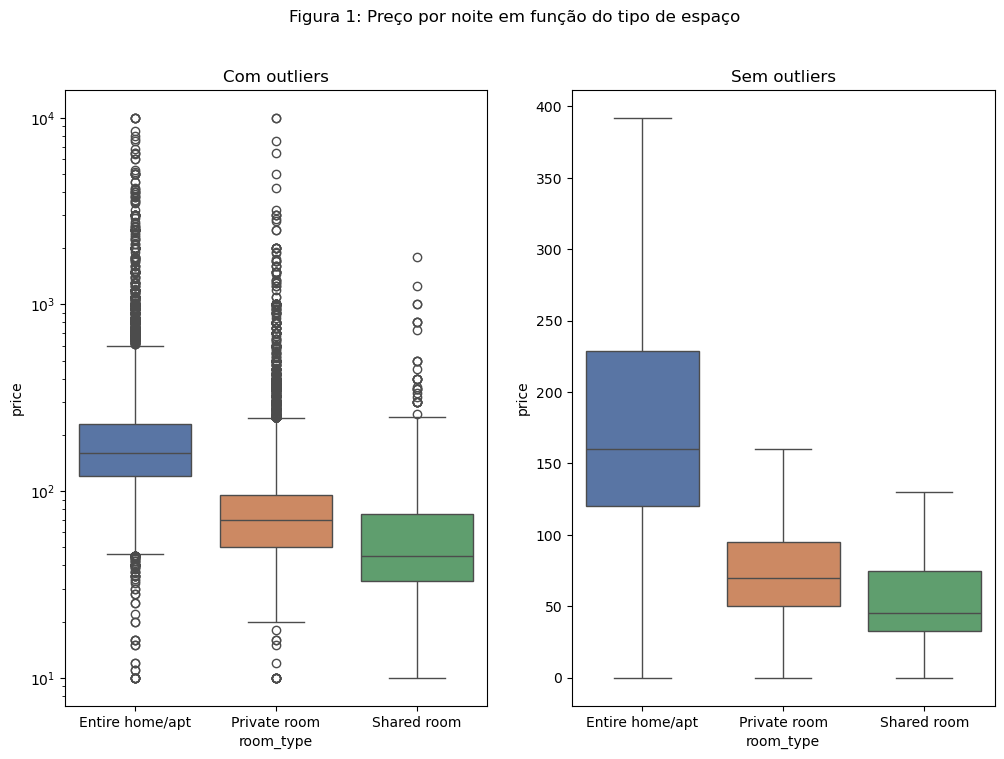

In [104]:
# Boxplot Preço x Tipo de espaço
fig, ax = plt.subplots(ncols=2, figsize=(12,8))
ax[0].set_title('Com outliers')
ax[0].set_yscale('log')
ax[1].set_title('Sem outliers')
sn.boxplot(data=df, x='room_type', y='price', ax=ax[0], palette='deep')
sn.boxplot(data=df, x='room_type', y='price', ax=ax[1], showfliers=False, palette='deep')
fig.suptitle('Figura 1: Preço por noite em função do tipo de espaço')


---
### Hipótese 2: A localização (Bairros) deve influenciar os preços (Lógica da oferta e demanda)

É esperado que:

- Regiões centrais ou turísticas (como Manhattan) tenham preços, em média, mais elevados
- Regiões mais afastadas dos centros (como Bronx e Staten Island) tenham preços mais baixos

Para avaliar essa hipótese, foi realizado o plot de um Heatmap de localização dos imóveis no estado de Nova Iorque pelo preço (Figura 2) e a distribuição de preços por bairro por meio de boxplots (Figura 3).

In [11]:
# Descartando os outliers
df_ = df[df['price'] < df['price'].quantile(0.95)]

# Centroids de cada bairro para adicionar o nome dos bairros no mapa
bairro_ny = pd.DataFrame({
    'latitude': [40.776, 40.650, 40.742, 40.579, 40.837], 
    'longitude': [-73.971, -73.949, -73.769, -74.152, -73.865],
    'city': ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']
})

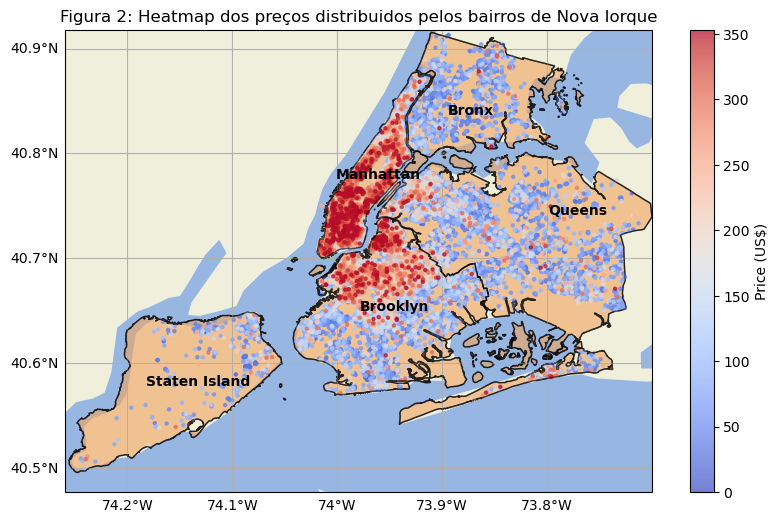

In [164]:
# Obtendo o shapefile do Estado de Nova Iorque usando Geopandas e o Geodatasets
gny = gpd.read_file(gds.get_path("nybb"))

# Iniciando a figura com projeção do Cartopy
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Definindo limites da área de Nova York
ax.set_extent([-74.2591, -73.7004, 40.4774, 40.9176], crs=ccrs.PlateCarree())
ax.set_title('Figura 2: Heatmap dos preços distribuidos pelos bairros de Nova Iorque')

# Ordenando o dataframe pela coluna de preços para evidenciar melhor as regiões de altos preços no Heatmap 
df_ = df_.sort_values(by='price')

# Heatmap
sc = ax.scatter(df_['longitude'], df_['latitude'], c=df_['price'], cmap='coolwarm', alpha=0.7, s=5,zorder=10, transform=ccrs.PlateCarree())

# Adicionando o nome dos bairros
for i in range(len(bairro_ny)):
    ax.text(bairro_ny['longitude'][i]-0.03,
            bairro_ny['latitude'][i],
            bairro_ny['city'][i], 
            fontsize=10, fontweight='bold',
            ha='left',
            transform=ccrs.PlateCarree(), zorder=30)

gny.to_crs(ccrs.PlateCarree()).plot(alpha=0.6, edgecolor="k", ax=ax, facecolor='sandybrown', zorder=1, lw=1)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
gny.to_crs(ccrs.PlateCarree()).plot(alpha=0.6, edgecolor="k", ax=ax, facecolor='None', zorder=20) # Coloquei novamente para reforçar as linhas divisórias do mapa

plt.colorbar(sc, ax=ax, label="Price (US$)")
ax.gridlines(draw_labels={"bottom": "x", "left": "y"})


---
A análise da Figura 2 confirma a expectativa de que os aluguéis mais caros estão concentrados em Manhattan e no norte do Brooklyn, especialmente nas áreas próximas à divisa com Manhattan. Por outro lado, regiões mais afastadas, como Staten Island, Bronx, Queens e o sul do Brooklyn, apresentam os preços mais baixos.

Além disso, o gráfico da Figura 3 evidencia a hierarquia dos bairros mais caros, com Manhattan liderando, seguido por Brooklyn, Queens, Staten Island e, por último, o Bronx. Essa classificação é baseada na assimetria da distribuição dos preços em relação à mediana e no comprimento das caixas do boxplot. Ou seja, quanto maior a assimetria para cima da mediana, mais concentrados estão os altos valores dos preços. Além disso, caixas mais longas indicam uma maior variabilidade dos preços dentro do intervalo interquartil, sugerindo uma distribuição mais ampla de valores elevados.

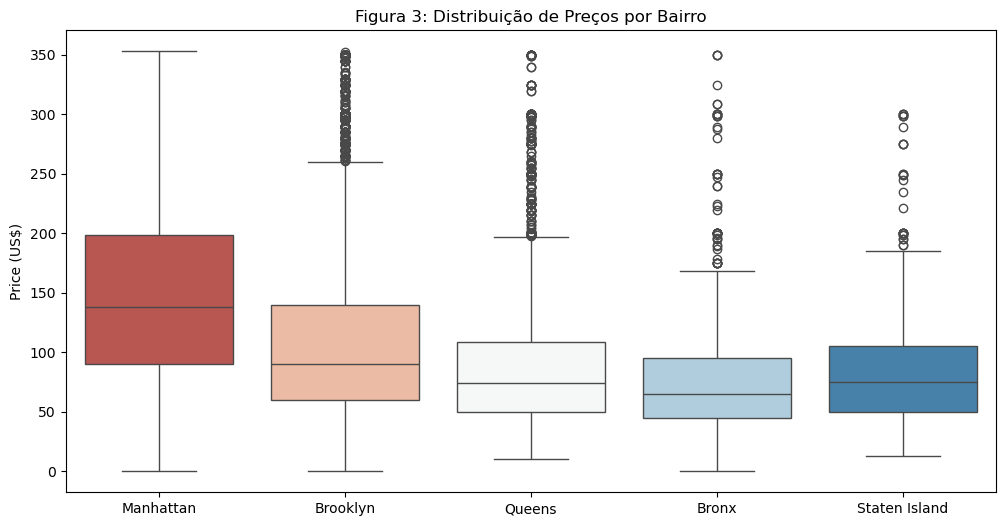

In [142]:
plt.figure(figsize=(12, 6))
sn.boxplot(data=df_.sort_values(by='price', ascending=False), x='bairro_group', y='price', palette='RdBu')
plt.title("Figura 3: Distribuição de Preços por Bairro")
plt.xlabel("")
plt.ylabel("Price (US$)")
plt.show()


---
### Hipótese 3: A avaliação do Imóvel pode indicar maiores demandas (Lógica da oferta e demanda)

É esperado que:

- Anúncios com muitos reviews sejam indicativos de alta procura, o que pode resultar em preços mais competitivos.
- Anúncios com poucas avaliações representem acomodações novas ou pouco atrativas.
- A frequência de avaliações mensais pode refletir duas dinâmicas distintas:
    1. Alta demanda e preços elevados: Se um imóvel recebe muitas avaliações por mês, é provável que seja bem localizado e tenha um bom custo-benefício, justificando preços mais altos.
    2. Alta demanda devido a preços baixos: Caso o preço seja muito competitivo, ele pode atrair mais hóspedes, aumentando a quantidade de reviews mensais.
 

Para testar essas hipóteses, analisou-se a relação entre o número total de avaliações (reviews) e a frequência de avaliações por mês com o preço do espaço (Figuras 4 e 5).
Os resultados da Figura 4 mostram que imóveis com poucas avaliações apresentam grande variabilidade nos preços. No entanto, à medida que o número de avaliações aumenta, a amplitude da variabilidade dos preços tendem a diminuir, sugerindo um comportamento competitivo no mercado, onde os hosts ajustam os valores para atrair mais clientes.
Esse mesmo padrão é observado na Figura 5, onde a variabilidade dos preços diminui conforme cresce a frequência de avaliações mensais. Essa tendência indica que acomodações com um maior histórico de avaliações podem estar mais alinhadas às expectativas de preço dos consumidores.

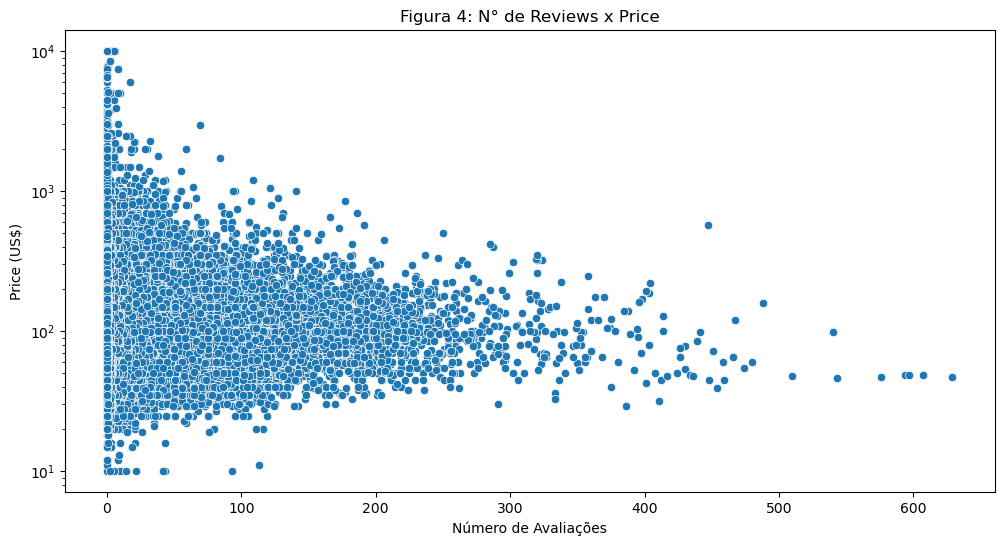

In [34]:
plt.figure(figsize=((12,6)))
sn.scatterplot(data=df, x='numero_de_reviews', y='price', alpha=1)
plt.title("Figura 4: N° de Reviews x Price")
plt.xlabel("Número de Avaliações")
plt.ylabel("Price (US$)")
plt.yscale("log")


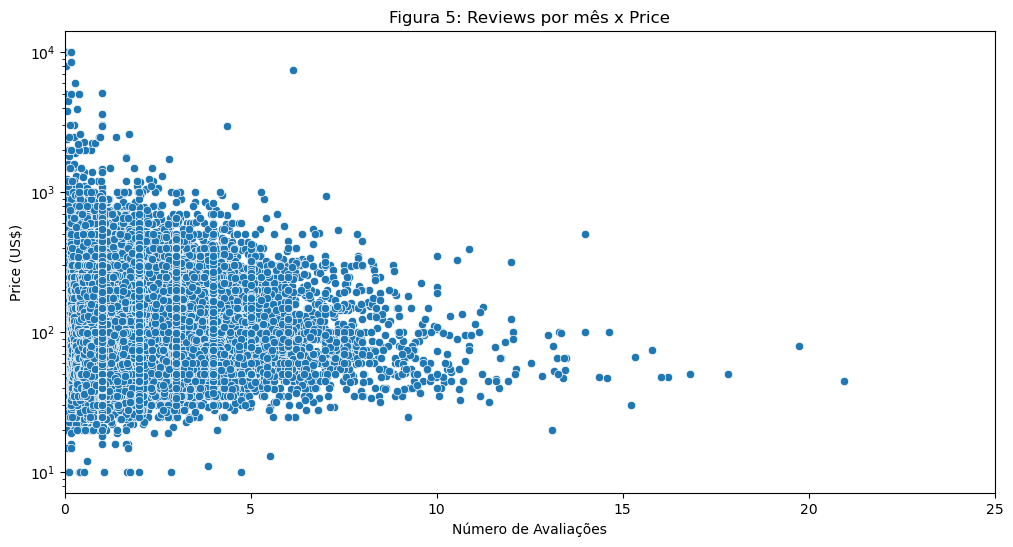

In [38]:
plt.figure(figsize=((12,6)))
sn.scatterplot(data=df, x='reviews_por_mes', y='price', alpha=1)
plt.title("Figura 5: Reviews por mês x Price")
plt.xlabel("Número de Avaliações")
plt.ylabel("Price (US$)")
plt.yscale("log")
plt.xlim([0, 25])

---
### Hipótese 4: Alta disponibilidade anual pode diminuir os valores dos preços (Lógica da oferta e demanda)

É esperado que:
- Espaços com alta disponibilidade ao longo do ano tendam a ter preços mais baixos, pois os hosts buscam manter uma alta taxa de ocupação, muitas vezes reduzindo os valores para atrair mais reservas.
  
- Espaços com pouca disponibilidade podem apresentar preços mais elevados, uma vez que são mais exclusivos, e consequentemente mais valorizados no mercado.

Essa dinâmica reflete a relação entre oferta e demanda, onde a escassez de disponibilidade pode justificar preços mais altos.

Para avaliar essa hipótese, foi analisada a dispersão entre a variável disponibilidade_365 e o preço (price), com o objetivo de observar a relação entre ambas (Figura 6). A análise do gráfico de dispersão permite verificar se há uma tendência de redução nos preços à medida que a disponibilidade anual aumenta, corroborando a hipótese de que hosts ajustam os valores para maximizar a ocupação de seus imóveis. Por outro lado, a Figura 6 apresenta uma grande variabilidade em toda a escala de disponibilidade anual, indicando que deve haver alguns hosts que mesmo com alta disponibilidade, mantêm preços mais altos devido a fatores como localização privilegiada, comodidades exclusivas ou reputação do anúncio.

Com isso em mente, a análise foi segmentada por tipo de imóvel e por localização (Figuras 7 e 8, respectivamente). No entanto, mesmo com essa segmentação, não foi observada uma relação clara entre a disponibilidade e o preço. Em todos os casos, os preços apresentam uma grande variabilidade em toda a escala da variável disponibilidade_365, independentemente do tipo de imóvel ou da localização. Isso indica que a disponibilidade anual, por si só, não é um fator determinante para a precificação.

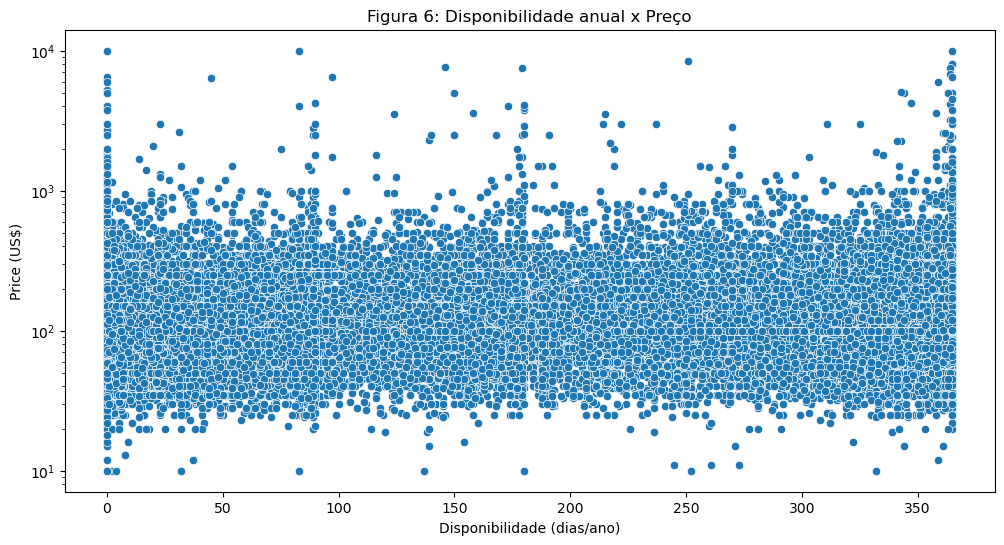

In [54]:
plt.figure(figsize=((12,6)))
sn.scatterplot(data=df, x='disponibilidade_365', y='price', alpha=1)
plt.title("Figura 6: Disponibilidade anual x Preço")
plt.xlabel("Disponibilidade (dias/ano)")
plt.ylabel("Price (US$)")
plt.yscale("log")

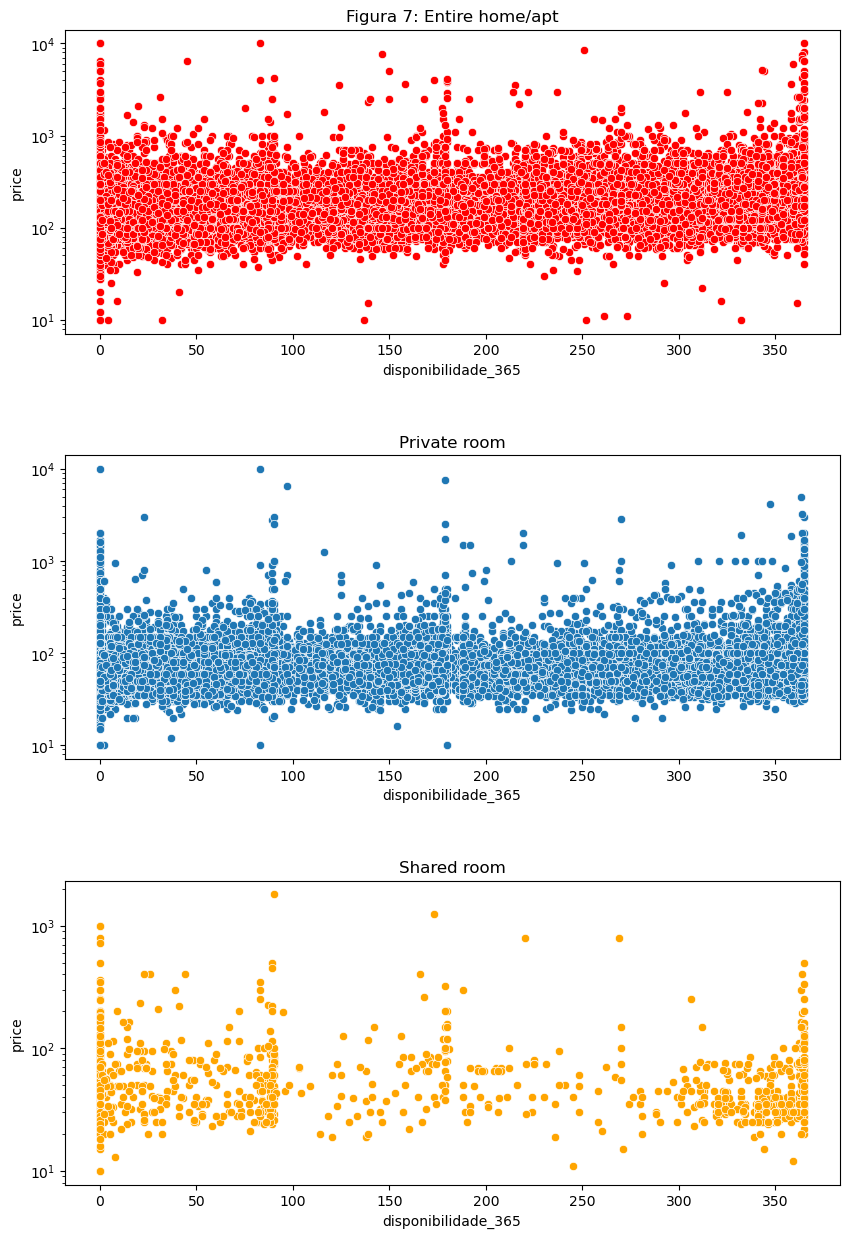

In [56]:
fig, ax = plt.subplots(nrows=3, figsize = (10,15))

sn.scatterplot(ax=ax[0], color='red',
               data=df[df['room_type']=='Entire home/apt'],
               x='disponibilidade_365', y='price', alpha=1)
ax[0].set_title('Figura 7: Entire home/apt')
ax[0].set_yscale('log')

sn.scatterplot(ax=ax[1],
               data=df[df['room_type']=='Private room'],
               x='disponibilidade_365', y='price', alpha=1)
ax[1].set_title('Private room')
ax[1].set_yscale('log')

sn.scatterplot(ax=ax[2], color='orange',
               data=df[df['room_type']=='Shared room'],
               x='disponibilidade_365', y='price', alpha=1)
ax[2].set_title('Shared room')
ax[2].set_yscale('log')
plt.subplots_adjust(hspace=0.4)

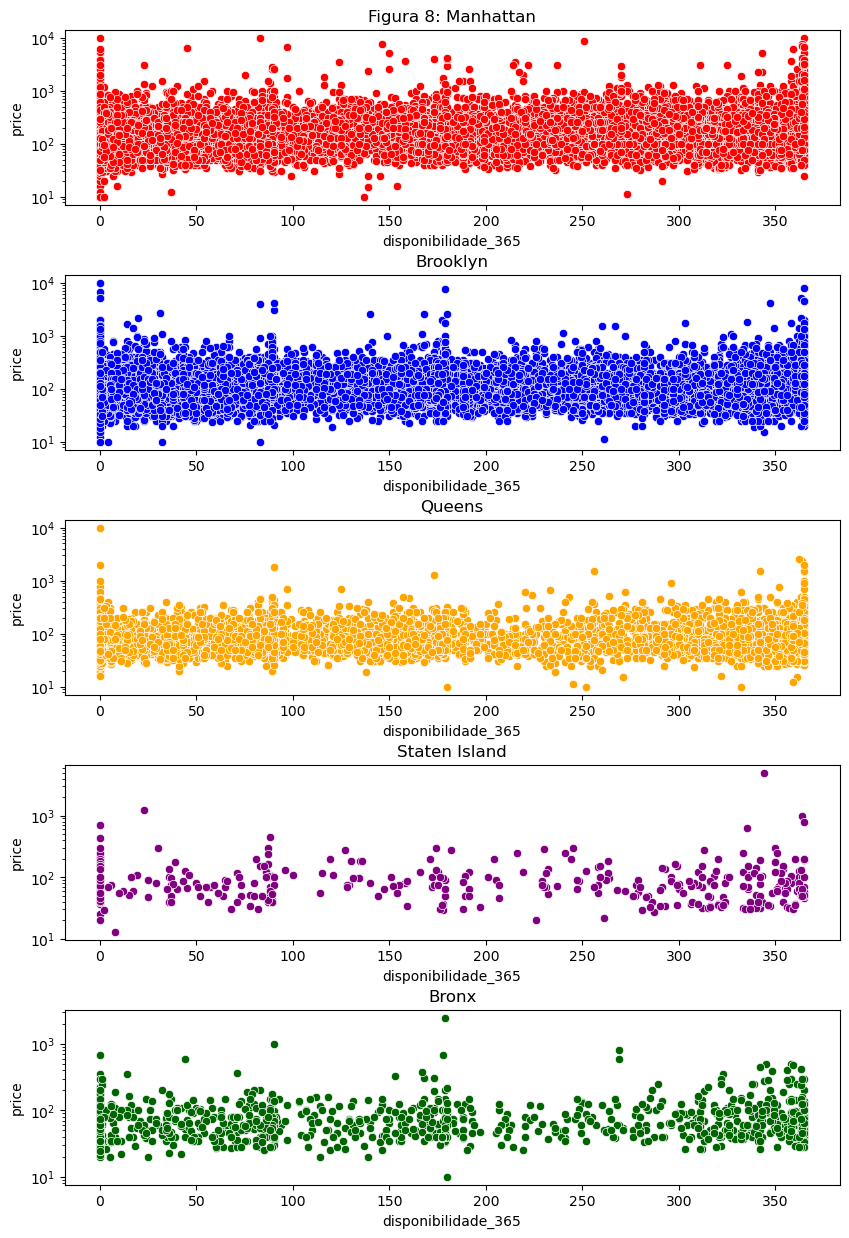

In [58]:
fig, ax = plt.subplots(nrows=5, figsize = (10,15))

cities = list(bairro_ny.city)
color = ['red', 'blue', 'orange', 'purple', 'darkgreen']

for i in range(len(cities)):
    sn.scatterplot(ax=ax[i], color=color[i],
               data=df[df['bairro_group']==cities[i]],
               x='disponibilidade_365', y='price', alpha=1)
    if i ==0:
        ax[i].set_title('Figura 8: Manhattan')
    else:
        ax[i].set_title(f'{cities[i]}')
    ax[i].set_yscale('log')

plt.subplots_adjust(hspace=0.4)

---
### Hipótese 5: Mínimo de noites x Preço

É esperado que:

- Mínimos de noites mais baixos (como minimo_noites = 1) que deveriam estar associados a preços mais baixos, pois esses imóveis tendem a atender turistas em estadias curtas, com foco em maior rotatividade e ocupação, podem ter uma alta amplitude de variação de preços devido a diversidade de tipos de imóveis.

-A amplitude da distribuição dos preços diminuem conforme o número mínimo de noites exigido cresce, com uma possível estabilização para estadias muito longas.

Para avaliar essa hipótese, foi analisada a relação entre o número mínimo de noites e o preço ofertado (Figura 9). Os resultados confirmam razoavelmente as expectativas levantadas, evidenciando uma leve redução na amplitude da distribuição dos preços conforme aumenta o requisito de estadia mínima, especialmente em regiões mais afastadas do centro de Nova Iorque.

Além disso, a Figura 10 reforça a hipótese de que imóveis com menor exigência de noites mínimas tendem a ter preços mais baixos.

(0.0, 600.0)

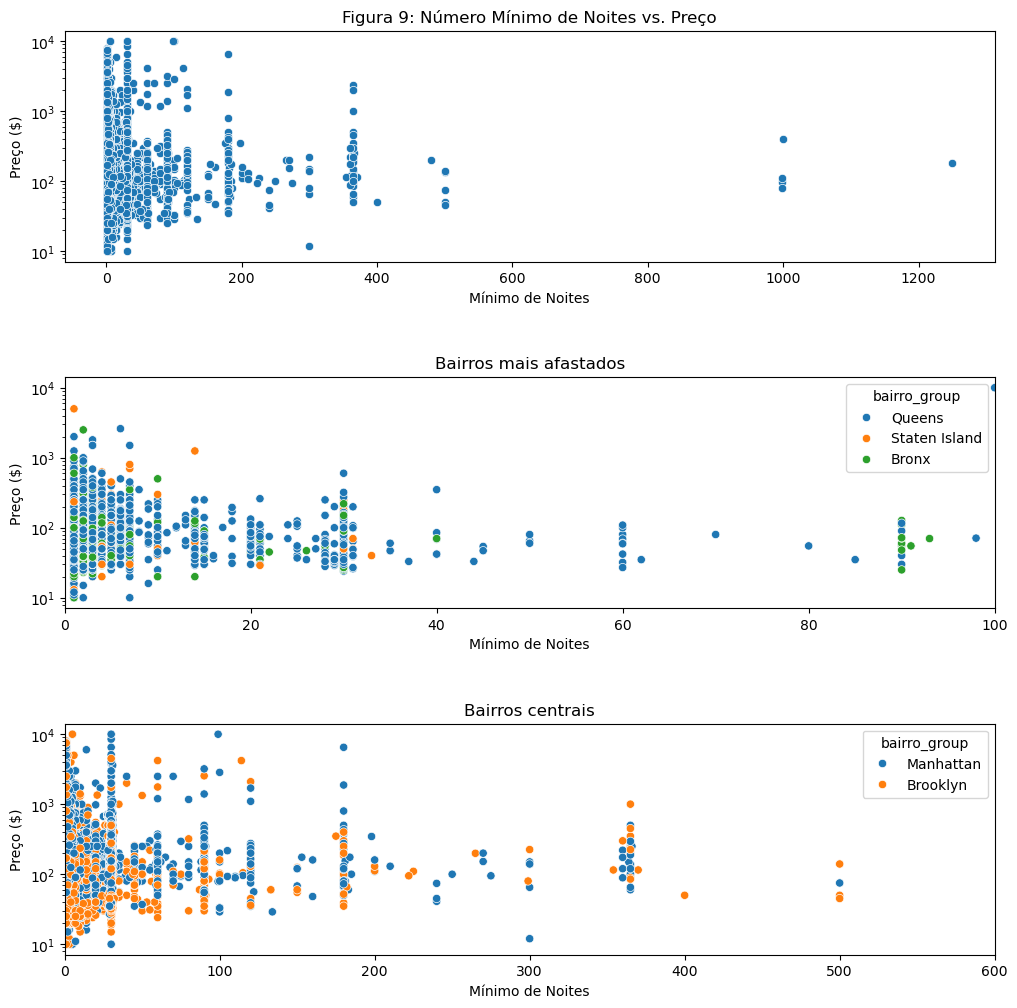

In [149]:
fig, ax = plt.subplots(nrows=3, figsize=(12,12))
fig.subplots_adjust(hspace=0.5)

sn.scatterplot(ax=ax[0], data=df, x='minimo_noites', y='price', alpha=1)
ax[0].set_title("Figura 9: Número Mínimo de Noites vs. Preço")
ax[0].set_xlabel("Mínimo de Noites")
ax[0].set_ylabel("Preço ($)")
ax[0].set_yscale("log")

sn.scatterplot(ax=ax[1], 
               data=df[(df.bairro_group == 'Queens') | 
                        (df.bairro_group == 'Bronx') | 
                        (df.bairro_group == 'Staten Island')],
               x='minimo_noites', y='price', hue='bairro_group', alpha=1)

ax[1].set_title("Bairros mais afastados")
ax[1].set_xlabel("Mínimo de Noites")
ax[1].set_ylabel("Preço ($)")
ax[1].set_yscale("log")
ax[1].set_xlim(0, 100)  

sn.scatterplot(ax=ax[2], 
               data=df[(df.bairro_group != 'Queens') & 
                        (df.bairro_group != 'Bronx') & 
                        (df.bairro_group != 'Staten Island')],
               x='minimo_noites', y='price', hue='bairro_group', alpha=1)

ax[2].set_title("Bairros centrais")
ax[2].set_xlabel("Mínimo de Noites")
ax[2].set_ylabel("Preço ($)")
ax[2].set_yscale("log")
ax[2].set_xlim(0, 600)  


Text(0.5, 0, 'Mínimo de Noites')

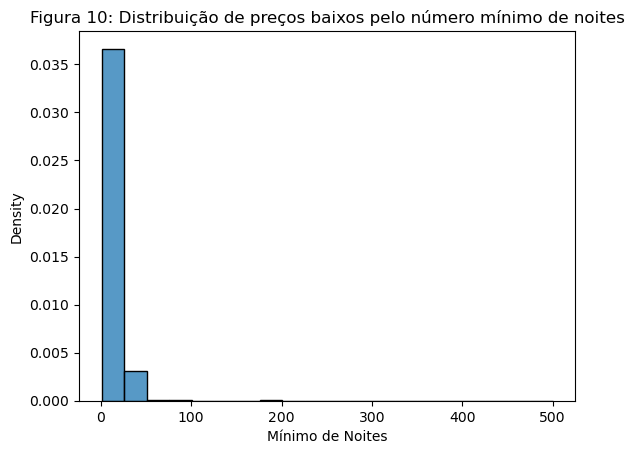

In [180]:
df1 = df[df['price'] < df['price'].quantile(0.99)]
fig, ax = plt.subplots(nrows=1)
fig.subplots_adjust(hspace=0.5)

price_low = df.price.quantile(0.3)

sn.histplot(ax=ax, data=df[df.price <= price_low], x='minimo_noites', stat='density', bins=20)
ax.set_title("Figura 10: Distribuição de preços baixos pelo número mínimo de noites")
ax.set_xlabel("Mínimo de Noites")


(-0.5, 799.5, 399.5, -0.5)

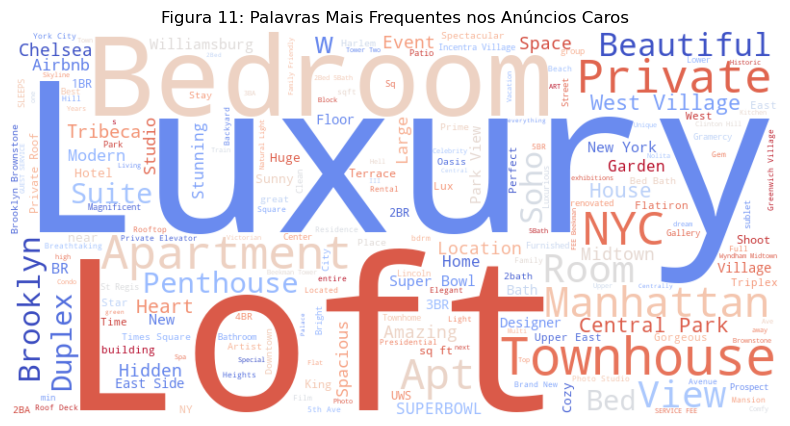

In [12]:
from wordcloud import WordCloud

high_price = df[df['price'] > df['price'].quantile(0.99)]
text = " ".join(high_price['nome'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="coolwarm").generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Figura 11: Palavras Mais Frequentes nos Anúncios Caros")
plt.axis("off")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\danil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


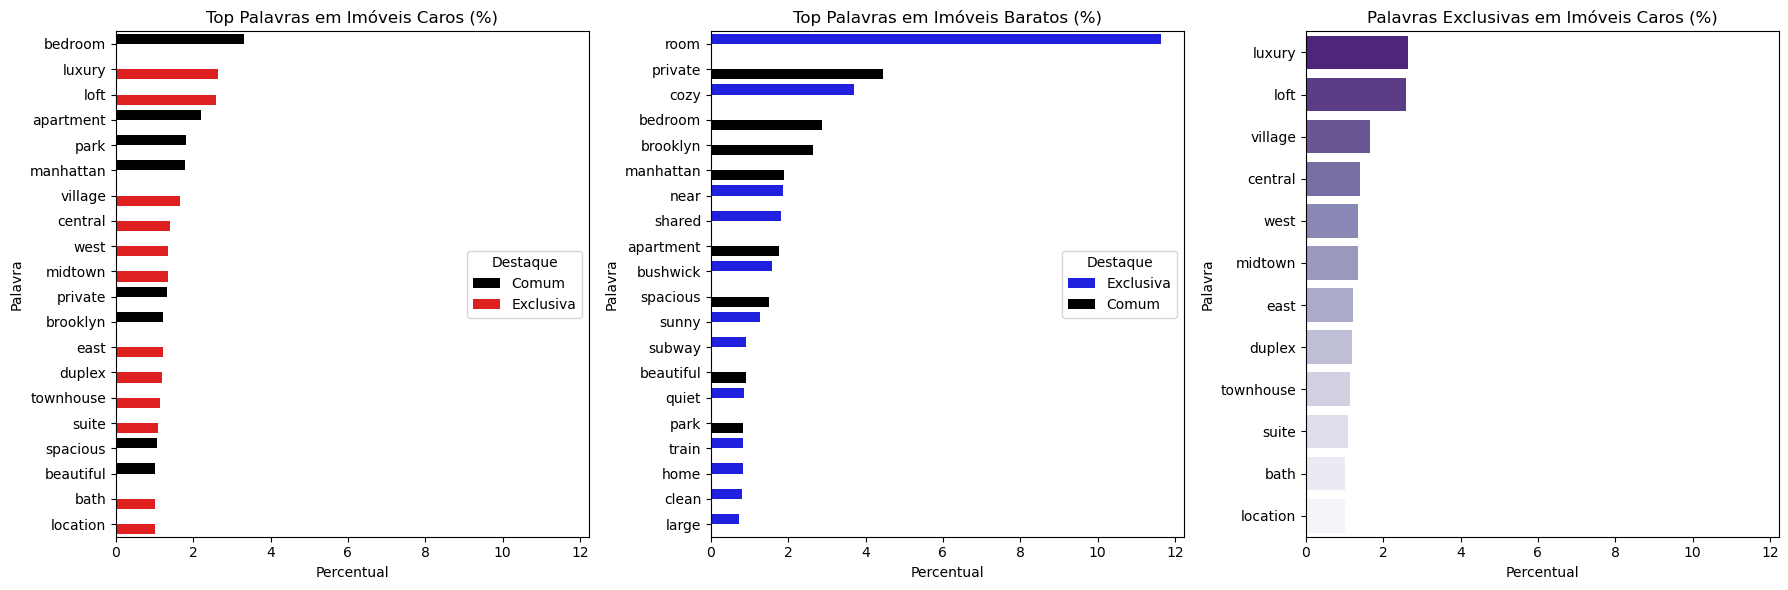

In [17]:
import re
from nltk.corpus import stopwords
from collections import Counter
import nltk

# Baixando as stopwords do NLTK para filtro de palavras no Nome dos anuncios
nltk.download('stopwords')

# Lista de stopwords
stop_words = set(stopwords.words('english'))  

def words_filter(df, column, stopwords, n=20):
    text = " ".join(df[column].dropna()).lower()
    words = re.findall(r'\b[a-zA-Z]{4,}\b', text)  # Manter apenas palavras com 4+ letras
    filtered_words = [word for word in words if word not in stopwords]  # Remove as stopwords
    counter = Counter(filtered_words) 
    total_words = sum(counter.values())
    return pd.DataFrame([(word, count, round(count / total_words * 100, 2)) for word, count in counter.most_common(n)], 
                        columns=['Palavra', 'Frequência', 'Percentual'])

# Separar imóveis caros e baratos (top 5% e bottom 5%)
high_price = df[df['price'] > df['price'].quantile(0.95)]
low_price = df[df['price'] < df['price'].quantile(0.05)]

df_high = words_filter(high_price, 'nome', stop_words)
df_low = words_filter(low_price, 'nome', stop_words)

# Palavras em comum
high_words = set(df_high['Palavra'])
low_words = set(df_low['Palavra'])
common_words = high_words & low_words

# Adicionar uma coluna para identificar palavras comuns
df_high['Destaque'] = df_high['Palavra'].apply(lambda x: 'Comum' if x in common_words else 'Exclusiva')
df_low['Destaque'] = df_low['Palavra'].apply(lambda x: 'Comum' if x in common_words else 'Exclusiva')

# Palavras exclusivas dos caros
exclusive_high_words = df_high[df_high['Palavra'].isin(high_words - low_words)]

# Criando a visualização com 3 gráficos
fig, ax = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# Imóveis caros (com destaque)
sn.barplot(data=df_high, y='Palavra', x='Percentual', hue='Destaque', palette={'Comum': 'black', 'Exclusiva': 'red'}, ax=ax[0])
ax[0].set_title("Top Palavras em Imóveis Caros (%)")

# Imóveis baratos (com destaque)
sn.barplot(data=df_low, y='Palavra', x='Percentual', hue='Destaque', palette={'Comum': 'black', 'Exclusiva': 'blue'}, ax=ax[1])
ax[1].set_title("Top Palavras em Imóveis Baratos (%)")

# Palavras exclusivas dos caros
sn.barplot(data=exclusive_high_words, y='Palavra', x='Percentual', palette='Purples_r', ax=ax[2])
ax[2].set_title("Palavras Exclusivas em Imóveis Caros (%)")

plt.tight_layout()
plt.show()


---
## Conclusões:

Os resultados confirmam que diversos fatores influenciam os preços dos imóveis na plataforma.

- **Tipo de Espaço:** "Entire home/apt" são os mais caros, seguidos por "Private room" e, por último, "Shared room". A hierarquia dos preços foi confirmada pelo boxplot, e os outliers seguem esse padrão.

- **Localização:** Regiões centrais e turísticas, como Manhattan e Brooklyn, apresentam preços mais elevados, enquanto áreas mais afastadas, como Bronx e Staten Island, têm preços mais baixos. O heatmap e a distribuição por bairro reforçam essa relação.

- **Avaliações e Frequência de Reviews:** Imóveis com muitas avaliações têm preços mais estáveis medianos, enquanto aqueles com poucas avaliações apresentam maior variabilidade. A frequência de reviews mensais pode indicar tanto alta demanda por bom custo-benefício quanto preços baixos que atraem maior rotatividade.

- **Disponibilidade Anual:** Esperava-se que imóveis com maior disponibilidade anual tivessem preços mais baixos, mas a análise mostrou grande variabilidade, sugerindo que a disponibilidade isoladamente não é um fator determinante para a precificação.

- **Número Mínimo de Noites:** Imóveis com exigência de apenas uma noite apresentam grande variação nos preços, enquanto aqueles com estadias mínimas mais longas tendem a ter preços mais estáveis, especialmente em áreas mais afastadas.

- **Padrão de Palavras nos Anúncios:** Termos como "Luxury", "Loft", "Townhouse", "Central", "Midtown", "Village", "Duplex" aparecem com mais frequência nos imóveis mais caros, enquanto palavras genéricas como "Bedroom" e "Private" são comuns em ambos os segmentos. A análise destaca que o uso de termos específicos pode influenciar a percepção de exclusividade e justificar preços mais altos.

Com base nesses insights, um investidor que deseja maximizar o retorno ao alugar um imóvel na plataforma deve priorizar apartamentos inteiros ("Entire home/apt") em regiões centrais e turísticas, como Manhattan e o norte do Brooklyn, onde a demanda é alta e os preços são elevados. Além disso, manter um mínimo de noites reduzido (1 a 3 noites) pode atrair mais turistas e aumentar a ocupação. Por fim, a escolha de palavras estratégicas no anúncio, como "Luxury", "Loft", "Central", "Midtown" pode agregar valor ao imóvel e justificar preços mais altos.


---
## Modelagem

Como o objetivo do projeto é prever o preço do aluguel, estamos lidando com um problema de regressão para predizer uma variavel continua. A partir do dataset disponibilizado e das conclusões decorrentes das hipoteses testadas, foi selecionado as seguintes variaveis para a modelagem:

#### Variaveis categóticas → (Transformação): 
Que necessitam de uma codificação no sentido de transformar "linguagem humana" na "linguagem do computador"

- **room_type** → *(One-Hot Encoding)*: Diferentes tipos de acomodações influenciam o preço
- **bairro_group** → *(One-Hot Encoding)*: A localização é um dos fatores mais determinantes.
- **keywords no título do anúncio** → *(TF-IDF)*: Para capturar padrões que indicam imóveis de alto valor, como "Luxury", "Loft" e "Central".

#### Variáveis Numéricas:
- **minimo_noites** → Será transformada com log(1 + x) para reduzir impacto de valores extremos (Há minimos acima de 300 dias e com poucas ocorrências).
- **numeros_de_reviews & reviews_por_mes** → Indicam demanda e serão normalizados.
- **latitude & longitude** → Será usada diretamente ou convertida em clusters geográficos para capturar padrões de localização.
- **price** → Como a variável alvo, será transformada com log(1 + x) para suavizar também outliers (valores acima de 800 dolares).

#### Variaveis **NÃO** utilizadas:
- **id** → É apenas um identificador único do imóvel, sem relevância para o preço.
- **host_id** → O ID do anfitrião também é um identificador e não influencia diretamente o valor do aluguel.
- **name** → Apesar de poder conter palavras-chave úteis, já extraímos as informações relevantes na análise de palavras do título.
- **host_name** → Nome do anfitrião não tem relação com o preço.
- **bairro** → É uma variavel redundante comparado as variaveis lat/lon. Além disso, transformá-la em uma variavel categórica seria relativamente complexo e poderia impactar na eficiencia modelo devido ao aumento na dimensionalidade (existem 221 bairros)
- **ultima_review** → A última data de avaliação não impacta diretamente o preço, mas poderia ser usada para inferir sazonalidade caso tivéssemos mais dados temporais.
- **calculado_host_listings_count** → Representa quantos imóveis o anfitrião tem, mas não influencia diretamente o valor de um único imóvel.
- **disponibilidade_365** → Pois não foi encontrado uma relação significativa entre essa variavel com o preço

In [53]:
len(df.bairro.unique())

221

In [82]:
df_filtered = df.drop(columns = ['id', 'host_id', 'host_name', 'bairro', 'ultima_review', 'calculado_host_listings_count', 'disponibilidade_365'])
df_filtered.head(5)

,nome,bairro_group,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,reviews_por_mes
0,Skylit Midtown Castle,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38
1,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00
2,Cozy Entire Floor of Brownstone,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64
3,Entire Apt: Spacious Studio/Loft by central park,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10
4,Large Cozy 1 BR Apartment In Midtown East,Manhattan,40.74767,-73.97500,Entire home/apt,200,3,74,0.59


---
### Transformação: Variaveis categóticas

**One-Hot Encoding** é uma tecnica que consiste em cria colunas binárias para cada categoria. Nesse sentido, em vez de por exemplo interpretamos os valores da variavel "bairro_group": "Entire home/apt", "Private room" e "Shared room", teríamos uma lista com 3 elementos, onde cada elemento teria valor 1 (se for essa categoria) e 0 caso contrário nos demais. 

In [88]:
# One-Hot Encoding
df_categorico = pd.get_dummies(df_filtered, columns=['room_type'], prefix='room_type')
df_categorico = pd.get_dummies(df_categorico, columns=['bairro_group'], prefix='bairro_group')
df_categorico.head(5)

,nome,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,bairro_group_Queens,bairro_group_Staten Island
0,Skylit Midtown Castle,40.75362,-73.98377,225,1,45,0.38,1,0,0,0,0,1,0,0
1,THE VILLAGE OF HARLEM....NEW YORK !,40.80902,-73.94190,150,3,0,0.00,0,1,0,0,0,1,0,0
2,Cozy Entire Floor of Brownstone,40.68514,-73.95976,89,1,270,4.64,1,0,0,0,1,0,0,0
3,Entire Apt: Spacious Studio/Loft by central park,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,0,1,0,0
4,Large Cozy 1 BR Apartment In Midtown East,40.74767,-73.97500,200,3,74,0.59,1,0,0,0,0,1,0,0


---
**TF-IDF** mede a relevância de uma palavra dentro de um conjunto, atribuindo um peso maior às palavras que são mais frequentes em um título, mas raras no conjunto de todos os títulos.

In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Palavras chave obtidas pelo terceiro gráfico da figura 12 
keywords = ['luxury', 'loft', 'village', 'central', 'west', 'midtown', 'east', 'duplex', 'townhouse', 'suite ']
tfidf = TfidfVectorizer(vocabulary=keywords, stop_words='english')
X_tfidf = tfidf.fit_transform(df['nome'])

# visualização
df_tfidf = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
df_tfidf.head()

,luxury,loft,village,central,west,midtown,east,duplex,townhouse,suite
0,0.0,0.000000,0.0,0.000000,0.0,1.00000,0.000000,0.0,0.0,0.0
1,0.0,0.000000,1.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0
3,0.0,0.695121,0.0,0.718893,0.0,0.00000,0.000000,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.000000,0.0,0.77671,0.629859,0.0,0.0,0.0


In [138]:
# Concatenando
df_f = pd.concat([df_categorico, df_tfidf], axis=1).drop(columns='nome')
df_f.head(5)

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_group_Bronx,...,luxury,loft,village,central,west,midtown,east,duplex,townhouse,suite
0,40.75362,-73.98377,225,1,45,0.38,1,0,0,0,...,0.0,0.000000,0.0,0.000000,0.0,1.00000,0.000000,0.0,0.0,0.0
1,40.80902,-73.94190,150,3,0,0.00,0,1,0,0,...,0.0,0.000000,1.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0
2,40.68514,-73.95976,89,1,270,4.64,1,0,0,0,...,0.0,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0
3,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,...,0.0,0.695121,0.0,0.718893,0.0,0.00000,0.000000,0.0,0.0,0.0
4,40.74767,-73.97500,200,3,74,0.59,1,0,0,0,...,0.0,0.000000,0.0,0.000000,0.0,0.77671,0.629859,0.0,0.0,0.0


### Variáveis Numéricas:
- **minimo_noites** → Será transformada com log(1 + x) para reduzir impacto de valores extremos (Há minimos acima de 300 dias e com poucas ocorrências).
- **numeros_de_reviews & reviews_por_mes** → Indicam demanda e serão normalizados.
- **latitude & longitude** → Será usada diretamente ou convertida em clusters geográficos para capturar padrões de localização.
- **price** → Como a variável alvo, será transformada com log(1 + x) para suavizar também outliers (valores acima de 800 dolares).

In [154]:
from sklearn.preprocessing import StandardScaler

# Normalização
scaler = StandardScaler()
df_f['numero_de_reviews'] = scaler.fit_transform(df_f[['numero_de_reviews']])
df_f['reviews_por_mes'] = scaler.fit_transform(df_f[['reviews_por_mes']])

# Transformação log(1+x):
df_f['minimo_noites'] = np.log1p(df_f['minimo_noites'])
df_f['price'] = np.log1p(df_f['price'])

df_f.head(5)

,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_group_Bronx,...,loft,village,central,west,midtown,east,duplex,townhouse,suite,localizacao_cluster
0,40.75362,-73.98377,5.420535,0.693147,0.487654,-0.445087,1,0,0,0,...,0.000000,0.0,0.000000,0.0,1.00000,0.000000,0.0,0.0,0.0,7
1,40.80902,-73.94190,5.017280,1.386294,-0.522435,-0.682992,0,1,0,0,...,0.000000,1.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,1
2,40.68514,-73.95976,4.499810,0.693147,5.538098,2.221950,1,0,0,0,...,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,17
3,40.79851,-73.94399,4.394449,2.397895,-0.320417,-0.620385,1,0,0,0,...,0.695121,0.0,0.718893,0.0,0.00000,0.000000,0.0,0.0,0.0,1
4,40.74767,-73.97500,5.303305,1.386294,1.138600,-0.313614,1,0,0,0,...,0.000000,0.0,0.000000,0.0,0.77671,0.629859,0.0,0.0,0.0,7


In [164]:
from sklearn.cluster import KMeans

# Usando clusterizando as localização (lat/lon)
kmeans = KMeans(n_clusters=20, random_state=42)
df_f['localizacao_cluster'] = kmeans.fit_predict(df_f[['latitude', 'longitude']])
df_f = df_f.drop(columns=['latitude', 'longitude'])
df_f.head(5)

,price,minimo_noites,numero_de_reviews,reviews_por_mes,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,bairro_group_Bronx,bairro_group_Brooklyn,bairro_group_Manhattan,...,loft,village,central,west,midtown,east,duplex,townhouse,suite,localizacao_cluster
0,5.420535,0.693147,0.487654,-0.445087,1,0,0,0,0,1,...,0.000000,0.0,0.000000,0.0,1.00000,0.000000,0.0,0.0,0.0,7
1,5.017280,1.386294,-0.522435,-0.682992,0,1,0,0,0,1,...,0.000000,1.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,1
2,4.499810,0.693147,5.538098,2.221950,1,0,0,0,1,0,...,0.000000,0.0,0.000000,0.0,0.00000,0.000000,0.0,0.0,0.0,17
3,4.394449,2.397895,-0.320417,-0.620385,1,0,0,0,0,1,...,0.695121,0.0,0.718893,0.0,0.00000,0.000000,0.0,0.0,0.0,1
4,5.303305,1.386294,1.138600,-0.313614,1,0,0,0,0,1,...,0.000000,0.0,0.000000,0.0,0.77671,0.629859,0.0,0.0,0.0,7
